# One Sample

This notebook demonstrates the one-sample *t*-test and checking normality with a Q-Q plot, using the [ZARR13.DAT](https://www.itl.nist.gov/div898/handbook/eda/section4/eda4281.htm) file from the *NIST e-Handbook of Statistical Methods*.

## Setup

Import our Python modules:

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import statsmodels.api as sm
import matplotlib.pyplot as plt

Read the [ZARR13.DAT](https://www.itl.nist.gov/div898/handbook/datasets/ZARR13.DAT) file:

In [2]:
data = pd.read_table('ZARR13.DAT', skiprows=25, names=['X'])
data

,X
0,9.206343
1,9.299992
2,9.277895
3,9.305795
4,9.275351
...,...
190,9.232963
191,9.234956
192,9.216746
193,9.274107


## Showing the Distribution

Let's look at histogram:

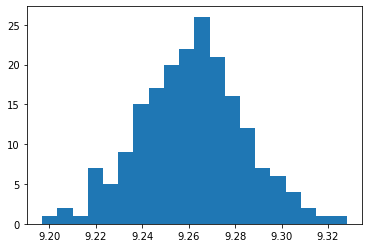

In [3]:
plt.hist(data.X, bins=20)
plt.show()

And the distribution statistics:

In [4]:
data.X.describe()

count    195.000000
mean       9.261461
std        0.022789
min        9.196848
25%        9.246496
50%        9.261952
75%        9.275530
max        9.327973
Name: X, dtype: float64

### Q-Q Plot

The data looks normal-ish, but a histogram isn't a very reliable way to assess normality.  A Q-Q plot against the normal distribution lets us be much more precise:

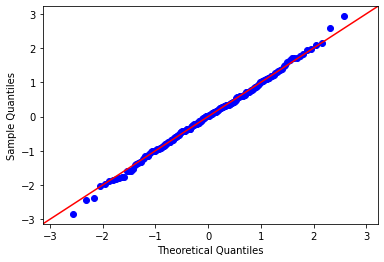

In [5]:
sm.qqplot(data.X, fit=True, line='45')
plt.show()

That data looks normal!  It's a straight line right through the bulk of the data. It's common for the first and last few points to deviate from normal just a little bit more than the central mass of data points.

### Drawing Q-Q Ourselves

Let's try to draw our own.  The way we draw a Q-Q plot is this:

1. Sort the data values in ascending order.  These will be plotted on the *y* axis.
2. Compute the percentile for each data point - where is it in the range of data points?  We can do this with its position or count.  We don't label any point 0 or 1; instead, for point $i \in [1,n]$, we compute $v = i / (n + 1)$.
3. Compute the quantiles in the reference distribution (in our case, normal) for each data point position.  These will be plotted on the *x* axis.

Let's sort:

In [6]:
observed = data['X'].sort_values()

Now we need to compute the percentiles for each position.  The [`arange`](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) function is useful for this - it can generate $i = 1 \dots n$, and we can divide to rescale the points:

In [7]:
nobs = len(observed)
pred_ps = np.arange(1, nobs + 1) / (nobs + 1)

And we need to convert these percentiles into quantile values from the standard normal:

In [8]:
norm_dist = sps.norm()
pred_vs = norm_dist.ppf(pred_ps)

Finally, we can plot them against each other:

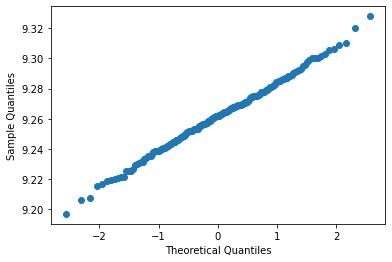

In [9]:
plt.scatter(pred_vs, observed)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

We can see the straight line, but two issues remain:

1. Our sample quantiles are on the original scale, but theoretical are standardized. Let's standardize the sample quantiles so the values, not just relative shape, are comparable.
2. We don't have the refernce line. This will be easier to draw with standardized sample quantiles.

**Standardization**, for normally-distributed data, is transforming it to have a mean of 0 and standard deviation of 1.  We do this by subtracting the mean and dividing by the sample standard deviation:

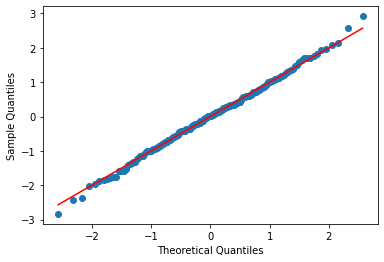

In [10]:
std_observed = (observed - observed.mean()) / observed.std()
# reference values; once standardized, the line will be y=x
ref_xs = np.linspace(np.min(pred_vs), np.max(pred_vs), 1000)
plt.plot(ref_xs, ref_xs, color='red')

# add the points
plt.scatter(pred_vs, std_observed)

# and labels
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

## T-tests

Let's start with a 1-sample T-test for $H_0: \mu = 9$:

In [11]:
sps.ttest_1samp(data.X, 9)

Ttest_1sampResult(statistic=160.21472007838156, pvalue=4.430052598624794e-208)

If $\mu$ were nine, it would be extremely unlikely to find a sample with this observed mean.

These values are very tightly distributed.  A 1-sample T-test for $H_0: \mu = 9.25$:

In [12]:
sps.ttest_1samp(data.X, 9.25)

Ttest_1sampResult(statistic=7.022783450050035, pvalue=3.5755854129627046e-11)

Our data would also be very unlikely, but not *as* unlikely, under this null hypothesis.

And just to see it accept the null, let's try $H_0: \mu = 9.26$:

In [13]:
sps.ttest_1samp(data.X, 9.26)

Ttest_1sampResult(statistic=0.895105984916905, pvalue=0.37183966110536093)

Our data is consistent with $\mu=9.26$.

**Note:** What I just did here — try several different null hypotheses in a row — is **not a valid statistical procedure**.  I am only doing it to demonstrate the results of a *t*-test both when the null hypothesis holds, and when it does not.